# DBSCAN realisation

In [ ]:
import random
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)


### Реализация DBSCAN

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin
from itertools import cycle
from math import hypot


# возврат массива индексов ближайших соседей для точки из множества с заданным расстоянием
def region_query(p, eps, data):
    return [idx for idx, q in enumerate(data) if np.linalg.norm(p - q) < eps]

class Clustering(BaseEstimator, ClusterMixin):
        
    def __init__(self, eps=0.5, min_samples=3):

        self.eps = eps
        self.min_samples = min_samples
        
    def fit(self, x, y=None):

        labels = np.zeros(len(x))

        NOISE = 0
        C = 0

        for idx, p in enumerate(x):
            if labels[idx] != 0:
                continue
            neighbours = region_query(p, self.eps, x)
            if len(neighbours) >= self.min_samples:
                C += 1
                labels[idx] = C
                for i in neighbours:
                    if labels[i] != 0:
                        continue
                    labels[i] = C
                    border = region_query(x[i], self.eps, x)
                    if len(border) >= self.min_samples:
                        neighbours += border
        self.labels = labels
        return self


    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.labels

Кластеризация на датасете `iris` из библиотеки `sklearn` 

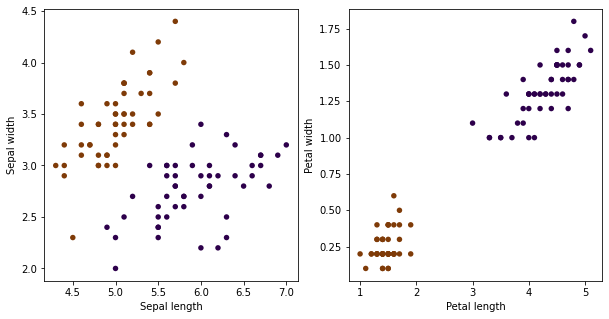

In [ ]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [ ]:
# при min_samples=3 ARI=1 при eps=[0.65, 1.64]

pred_iris = Clustering(eps=0.65, min_samples=3).fit_predict(x_iris)
print("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))
print(*pred_iris)

Adjusted Rand index for iris is: 1.00
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0


In [ ]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

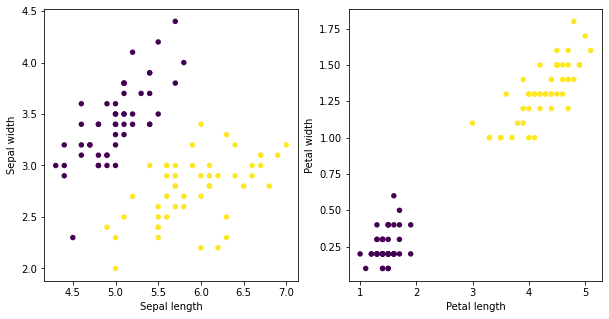

In [ ]:
# Graph for self-written algorithm

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap='viridis', lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap='viridis', lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

##### Метод локтя для DBSCAN и алгоритмы поиска ближайших соседей

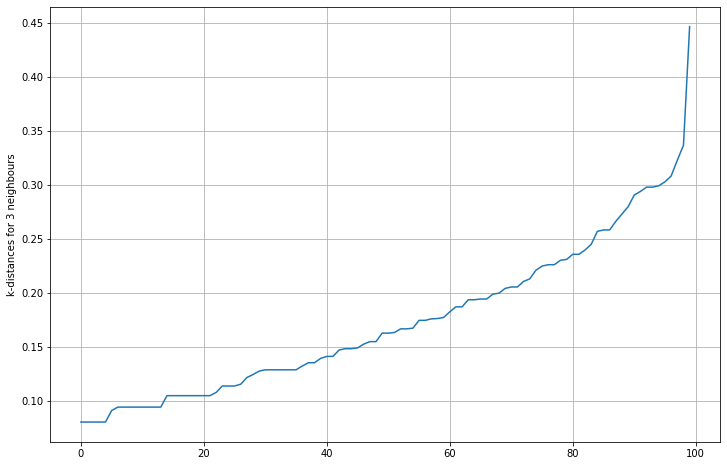

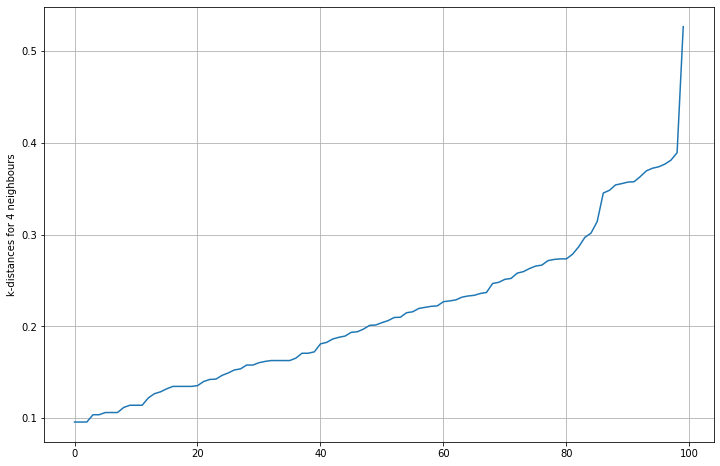

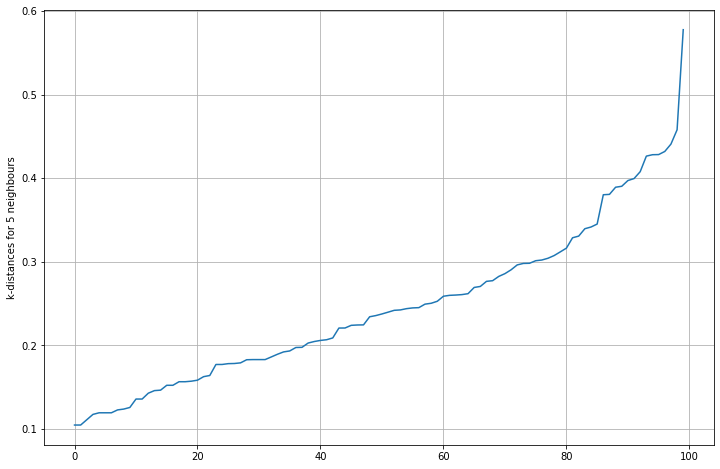

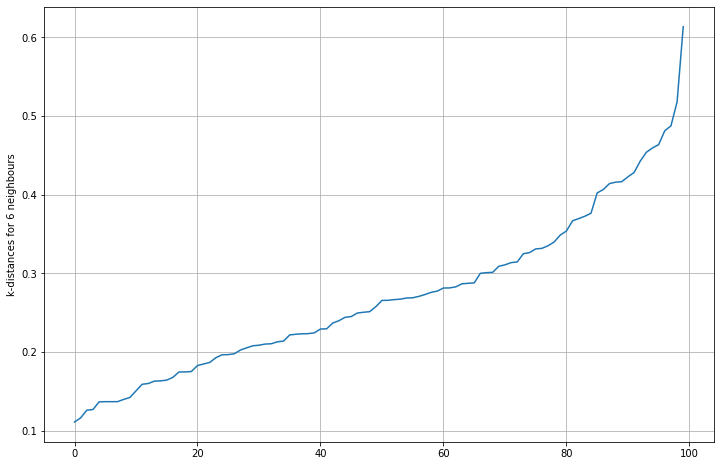

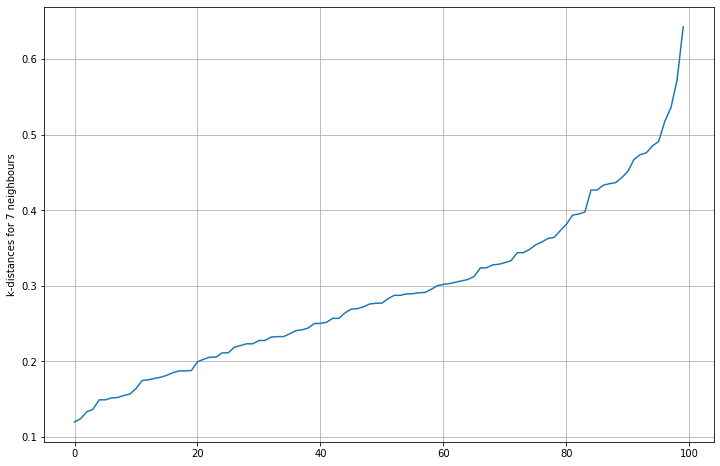

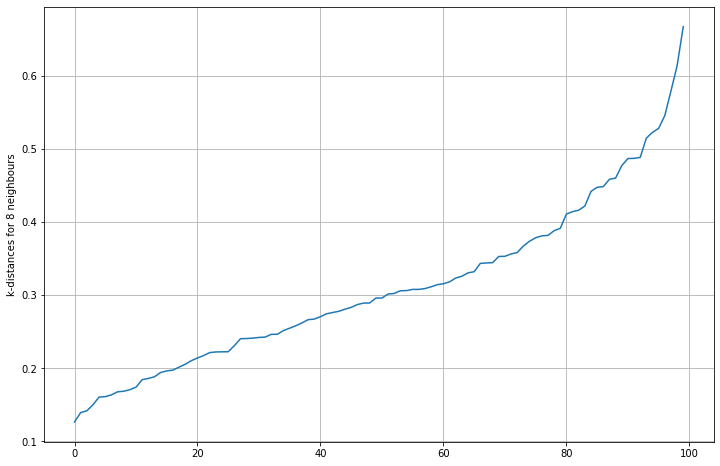

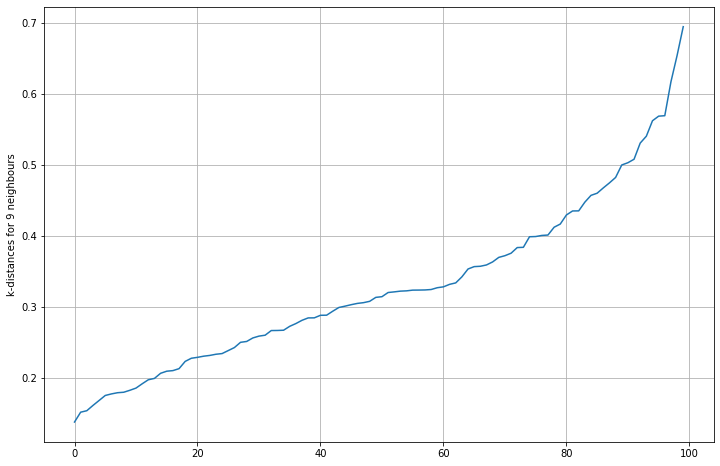

In [ ]:
# для точки высчитывается среднее расстояние до n ближайших соседей
def k_neib(p, data, n):
    return sum(sorted([np.linalg.norm(p - q) for q in data])[: n]) / n

# для каждой точки в датасете высчитывается среднее р-е до n ближайших соседей
def all_knn(min_pts, data):
    all_knn = []
    for i in data:
        all_knn.append(k_neib(i, data, min_pts))
    return sorted(all_knn)

# функция all_knn(min_pts) возвращает отсортированный массив средних расстояний каждой точки до её n ближайших соседей
for i in range(3, 10):
    nbrs = all_knn(i, x_iris)
    
    plt.plot(nbrs)
    plt.ylabel(f"k-distances for {i} neighbours")
    plt.grid(True)
    plt.show()

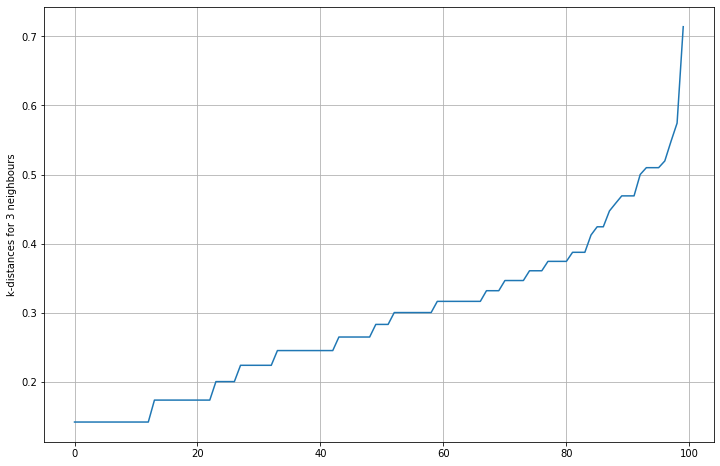

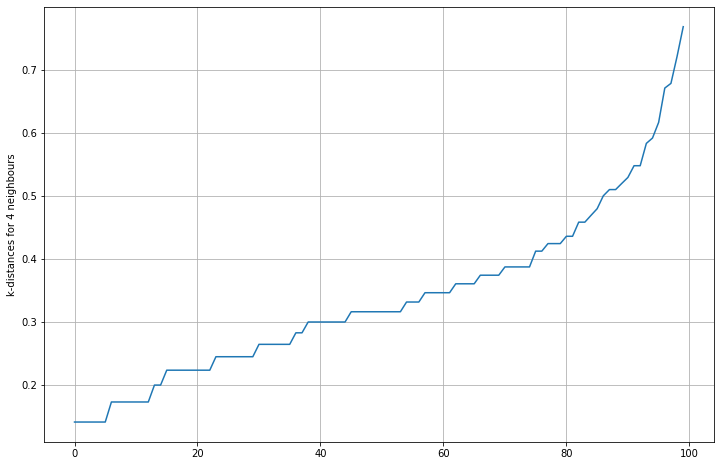

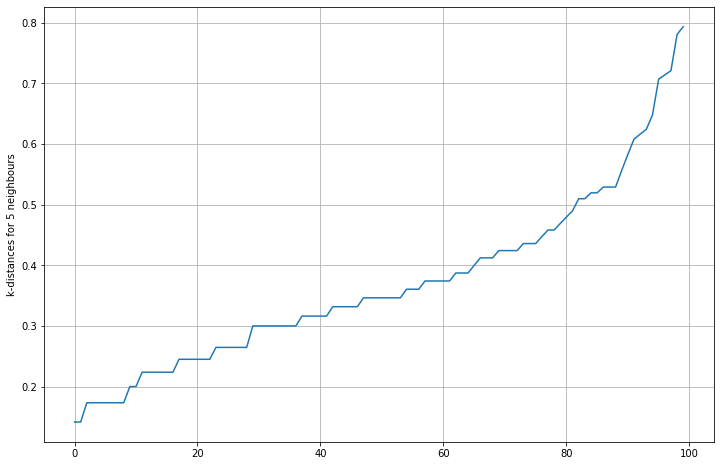

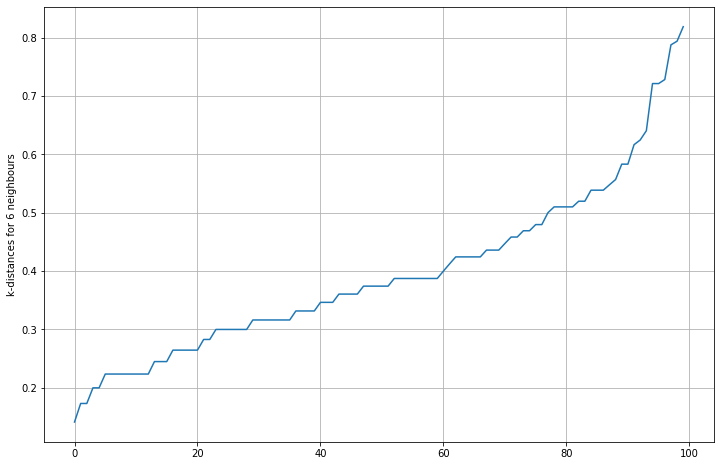

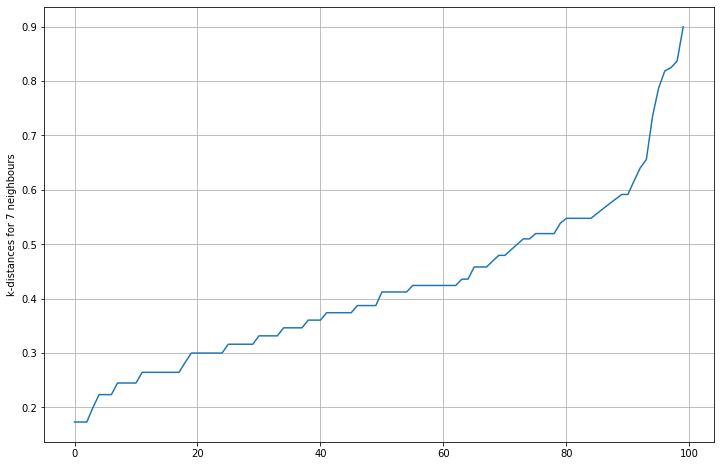

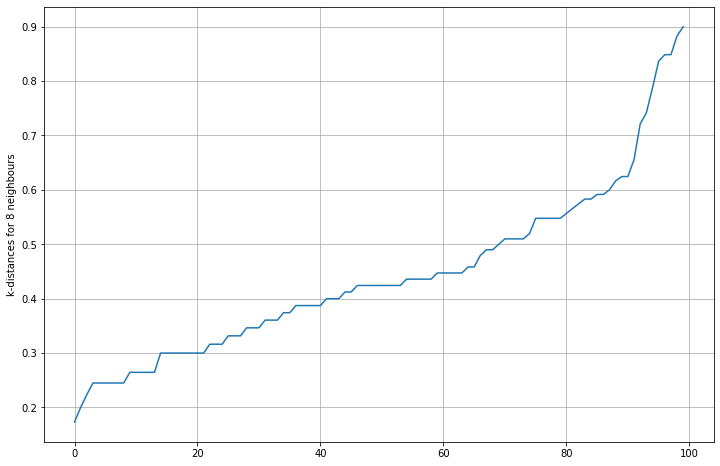

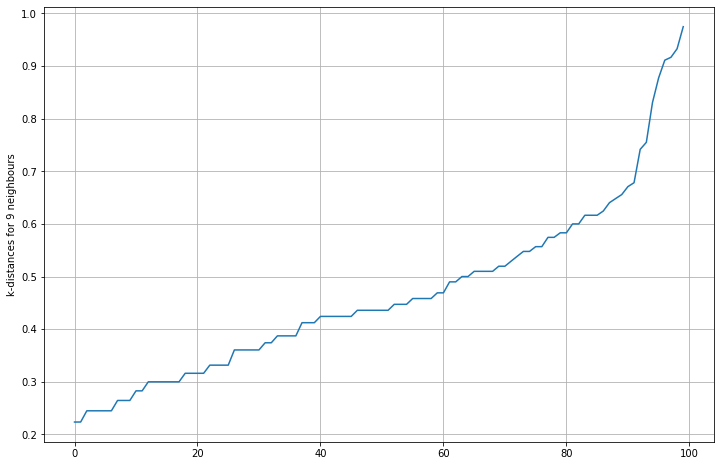

In [ ]:
from sklearn.neighbors import NearestNeighbors

for i in range(3, 10):
    nbrs = NearestNeighbors(n_neighbors=i, algorithm='ball_tree').fit(x_iris)
    distances, indices = nbrs.kneighbors(x_iris)
    
    plt.plot(sorted(distances[:, -1]))
    plt.ylabel(f"k-distances for {i} neighbours")
    plt.grid(True)
    plt.show()

***Кластеризация на встроенных датасетах разных форм***

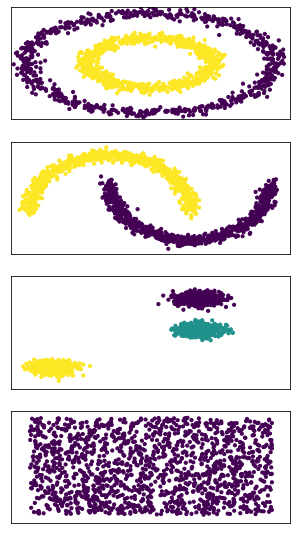

Self written DBSCAN work time: 56 sec 252065 microsec


In [ ]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from datetime import datetime

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

data = [noisy_circles, noisy_moons, blobs, no_structure]

start_time = datetime.now()

for i_dataset, dataset in enumerate(data):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    clust = Clustering(0.26, 3).fit_predict(X)
    
    # plot
    plt.subplot(4, 1, i_dataset + 1)
    plt.scatter(X[:, 0], X[:, 1], c=clust, s=10)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())

plt.show()

delta = datetime.now() - start_time
print(f"Self written DBSCAN work time: {delta.seconds} sec {delta.microseconds} microsec")

***Сравнение по времени и качеству с оригинальным алгоритмом `sklearn`***

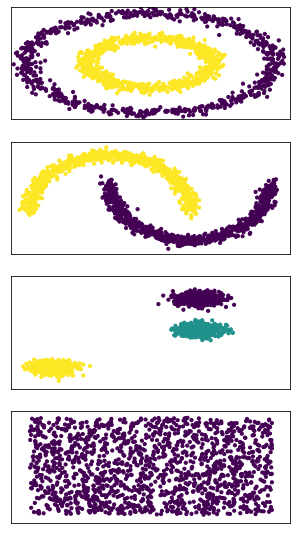

Sklearn DBSCAN work time: 0 sec 489518 microsec


In [ ]:
from sklearn.cluster import DBSCAN

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

data = [noisy_circles, noisy_moons, blobs, no_structure]

start_time = datetime.now()

for i_dataset, dataset in enumerate(data):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    db = DBSCAN(eps=0.26, min_samples=3).fit_predict(X)
    
    # plot
    plt.subplot(4, 1, i_dataset + 1)
    plt.scatter(X[:, 0], X[:, 1], c=db, s=10)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())

plt.show()

delta = datetime.now() - start_time
print(f"Sklearn DBSCAN work time: {delta.seconds} sec {delta.microseconds} microsec")